<a href="https://colab.research.google.com/github/luciedum-dot/Intro-to-data-analysis-with-Python---Final-Project/blob/main/Evolutions_of_Criminality_France_2016_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Data Cleaning notebook
This notebook will be used for the first part of our project, which is data cleaning


In [106]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [19]:
!git clone https://github.com/luciedum-dot/Intro-to-data-analysis-with-Python---Final-Project.git



fatal: destination path 'Intro-to-data-analysis-with-Python---Final-Project' already exists and is not an empty directory.


# **Part 1: Has criminality been on a rise in the past years?**

##Read and pivot Excel File - mec

In [107]:
#Read Excel File - total accused people and display the sheets' names

path = "Intro-to-data-analysis-with-Python---Final-Project/Data/mec.xlsx"

xls = pd.ExcelFile(path)
xls.sheet_names


['Lisez moi',
 '1.sexe - age',
 '2.nationalité',
 '3.sexe',
 '4.nationalité majmin',
 '5.PM - PP']

In [180]:
#Show the Excel File on the sheet sex, in order to look at the "total" line for every year and see the trend

#Read Excel on the sheet 3.sexe, skipping the first 2 rows and setting multiple headers (years and categories)
df = pd.read_excel(path, sheet_name="3.sexe", skiprows=2, header=[0, 1])

#Remove the 1st empty column of the sheet
df = df.iloc[:,1:]

#Pivot the year header
pivoted_df = (
    df
    .set_index("Sexe")
    .stack(level=1, future_stack=True)          # move second header to rows & future_stack=True just allow us to avoid a warning
    .reset_index()           # make it a column
    .rename(columns={"level_1": "Année"})
  )

#Cast the type of Sexe column from tupple to string
pivoted_df["Sexe"] = pivoted_df["Sexe"].str[0]

pivoted_df.head(30)

,Sexe,Année,Homicides (y compris coups et blessures volontaires suivis de mort),Tentatives d'homicide,Violences physiques dans le cadre intra-familial,Violences physiques hors cadre intra-familial,Violences sexuelles,Viols et tentatives de viols,Vols avec arme,Vols violents sans arme,Vols sans violence contre des personnes,Cambriolages de logement,Vols de véhicule,Vols dans les véhicule,Vols d'accessoires sur les véhicules,Destructions et dégradations volontaires,Escroqueries et fraudes aux moyens de paiements,Trafic de stupéfiants,Usage de stupéfiants
0,Femme,2016,135,195,15202,21601,1735,179,257,1574,16709,2953,991,1018,297,7981,20123,3489,16569
1,Femme,2017,174,196,16166,22340,1744,157,285,1398,16490,2898,959,1437,361,8435,19650,3693,17431
2,Femme,2018,188,197,16964,23212,2226,212,235,1389,16756,3021,1087,1303,258,8537,19190,3996,17267
3,Femme,2019,159,209,19064,22809,2166,264,239,1224,16352,3458,875,934,325,9433,17646,4275,16410
4,Femme,2020,148,254,22112,20139,2367,329,240,1137,13291,2548,892,964,404,8740,15767,3680,14221
5,Femme,2021,163,258,27604,21514,2731,419,216,982,14264,2396,983,1181,206,8378,16538,4015,17730
6,Femme,2022,173,294,32347,21104,2846,524,213,970,12799,2549,975,1040,316,7955,13251,4293,19178
7,Femme,2023,217,347,38058,22519,3154,644,253,1095,13423,2853,1285,841,310,8467,13499,4397,21969
8,Femme,2024,192,345,41543,22977,3642,739,273,905,12694,2729,1257,957,272,8665,12668,5090,21888
9,Homme,2016,851,1676,81190,105280,36515,10502,5474,17477,56807,39796,25072,24294,7220,70230,43860,37230,165861


##Display the df-mec just for Sex=Total

In [22]:
#Visualize just the total column
#An other way to do it, but less reliable :df_total = pivoted_df.loc[18:26] #df_total.head(10)
df_total = pivoted_df[pivoted_df["Sexe"] == "Total"]
display(df_total)


,Sexe,Année,Homicides (y compris coups et blessures volontaires suivis de mort),Tentatives d'homicide,Violences physiques dans le cadre intra-familial,Violences physiques hors cadre intra-familial,Violences sexuelles,Viols et tentatives de viols,Vols avec arme,Vols violents sans arme,Vols sans violence contre des personnes,Cambriolages de logement,Vols de véhicule,Vols dans les véhicule,Vols d'accessoires sur les véhicules,Destructions et dégradations volontaires,Escroqueries et fraudes aux moyens de paiements,Trafic de stupéfiants,Usage de stupéfiants
18,Total,2016,986,1871,96392,126881,38250,10681,5731,19051,73516,42749,26063,25312,7517,78211,63983,40719,182430
19,Total,2017,1124,2162,99234,130463,41195,11769,5974,17444,75509,42997,23620,27252,9586,84000,64398,43976,188802
20,Total,2018,1202,2318,106902,140508,47480,13718,5615,17762,77679,44320,25569,28307,8641,86237,61006,45476,186901
21,Total,2019,1124,2393,120950,136623,51090,15288,5426,17650,76580,40525,22617,25480,8187,86942,60623,47059,177423
22,Total,2020,1076,2609,138026,126220,52505,16816,5048,16257,65298,35134,20525,23750,6868,78796,52646,41197,160827
23,Total,2021,1175,2802,164256,133195,65480,22530,4937,16132,66110,32280,20687,22775,6019,75352,55864,46712,221372
24,Total,2022,1358,3099,180057,131188,70298,25278,5003,14505,64785,31140,19583,23412,7831,71869,50931,49012,251629
25,Total,2023,1427,3462,195000,137540,76549,28242,5080,13810,65652,32977,23412,21362,7703,75694,50222,48790,262871
26,Total,2024,1448,3390,197954,136407,80916,29035,5070,12809,63258,32087,23925,24093,7565,71054,47480,52325,290632


##Plotting absolute evolution of homicides

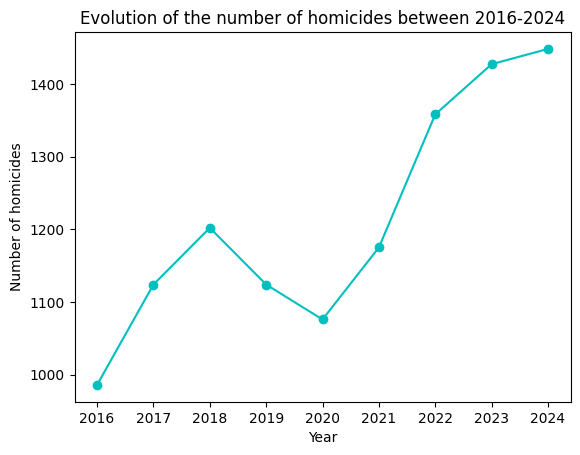

In [46]:
#Plot the absolute evolution of homicides to vizualize the trend
plt.plot(df_total['Année'], df_total['Homicides (y compris coups et blessures volontaires suivis de mort)'], '-oc')
plt.title("Evolution of the number of homicides between 2016-2024")
plt.xlabel("Year")
plt.ylabel("Number of homicides")
plt.show()

##Read Population Excel

In [47]:
#Analyze the evolution of criminality with taking into account population growth:
path = "Intro-to-data-analysis-with-Python---Final-Project/Data/pop.xlsx"

xls_pop = pd.ExcelFile(path)
xls_pop.sheet_names



['France - Figure 1',
 'France - Figure 2',
 'France - Figure 3',
 'France - Figure 4',
 'France - Figure 5',
 'France - Figure 6',
 'UE - Figure 1',
 'UE - Figure 2',
 'UE - Figure 3']

In [76]:
#Show the Excel File on the sheet France - Figure 2, in order to look at the "Ensemble" column for every year between 2016 to 2024
df_pop = pd.read_excel(path, sheet_name="France - Figure 2", skiprows=3)
df_pop = df_pop[0:-4] #Remove the last 4 rows which contained strings
df_pop.head(10)


,Année,Femmes,Hommes,Ensemble
0,2025,35326.405,33279.211,68605.616
1,2024,35254.976,33181.640,68436.616
2,2023,35172.311,33073.771,68246.082
3,2022,35092.520,32967.687,68060.207
4,2021,34930.005,32767.086,67697.091
5,2020,34812.046,32629.804,67441.850
6,2019,34722.069,32535.913,67257.982
7,2018,34594.401,32397.758,66992.159
8,2017,34477.222,32297.260,66774.482
9,2016,34372.558,32230.087,66602.645


In [77]:
df_pop_années = df_pop.loc[1:9]
display(df_pop_années)

,Année,Femmes,Hommes,Ensemble
1,2024,35254.976,33181.640,68436.616
2,2023,35172.311,33073.771,68246.082
3,2022,35092.520,32967.687,68060.207
4,2021,34930.005,32767.086,67697.091
5,2020,34812.046,32629.804,67441.850
6,2019,34722.069,32535.913,67257.982
7,2018,34594.401,32397.758,66992.159
8,2017,34477.222,32297.260,66774.482
9,2016,34372.558,32230.087,66602.645


##Plotting population evolution

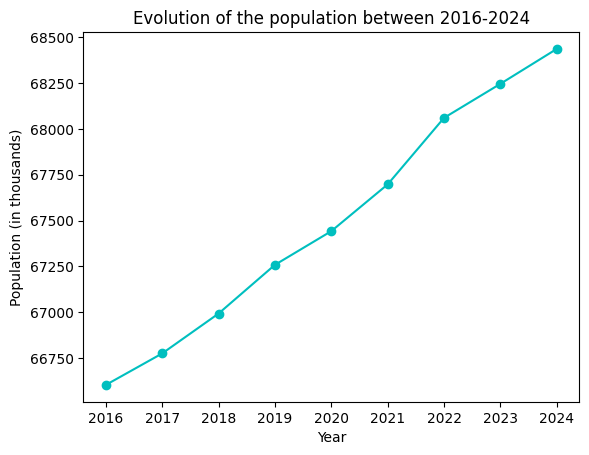

In [44]:
#Plot the evolution of the pop to vizualize the trend
plt.plot(df_pop_années['Année'], df_pop_années['Ensemble'], '-oc')
plt.title("Evolution of the population between 2016-2024")
plt.xlabel("Year")
plt.ylabel("Population (in thousands)")
plt.show()

##Add total pop on the same df as mec and plot their parallel evolution

In [35]:
#Gather data on homicides and population on the same table to then plot their evolution on the same graph
df_total_hom = df_total[['Année', 'Homicides (y compris coups et blessures volontaires suivis de mort)']]
df_pop_années_ensemble = df_pop_années[['Année', 'Ensemble']]
df_merged = pd.merge(df_total_hom, df_pop_années_ensemble, on="Année")
df_merged_renamed = df_merged.rename(columns={"Ensemble": "Population"})
df_merged_renamed.head(10)

,Année,Homicides (y compris coups et blessures volontaires suivis de mort),Population
0,2016,986,66602.645
1,2017,1124,66774.482
2,2018,1202,66992.159
3,2019,1124,67257.982
4,2020,1076,67441.850
5,2021,1175,67697.091
6,2022,1358,68060.207
7,2023,1427,68246.082
8,2024,1448,68436.616


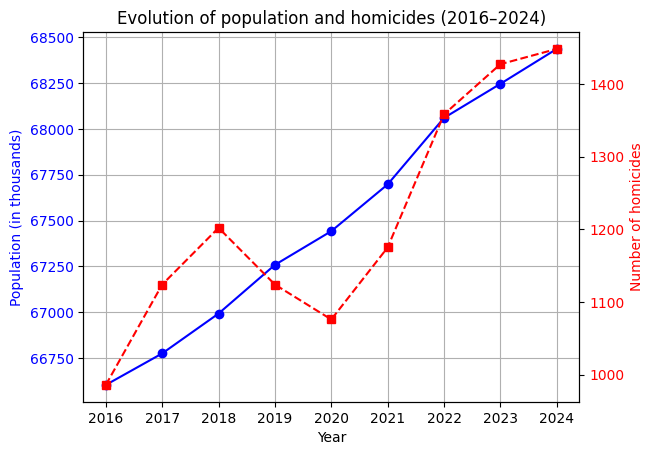

In [43]:
#Plot the evolution of population and homicides on the same graph
fig, ax1 = plt.subplots()

# Population (left axis)
ax1.plot(
    df_merged_renamed['Année'],
    df_merged_renamed['Population'],
    marker='o',
    linestyle='-',
    color='blue',
    label='Population'
)
ax1.set_xlabel("Year")
ax1.set_ylabel("Population (in thousands)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Homicides (right axis)
ax2 = ax1.twinx()
ax2.plot(
    df_merged_renamed['Année'],
    df_merged_renamed['Homicides (y compris coups et blessures volontaires suivis de mort)'],
    marker='s',
    linestyle='--',
    color='red',
    label='Number of homicides'
)
ax2.set_ylabel("Number of homicides", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title
plt.title("Evolution of population and homicides (2016–2024)")

# Grid
ax1.grid(True)

plt.show()

##Compute the homicide rate

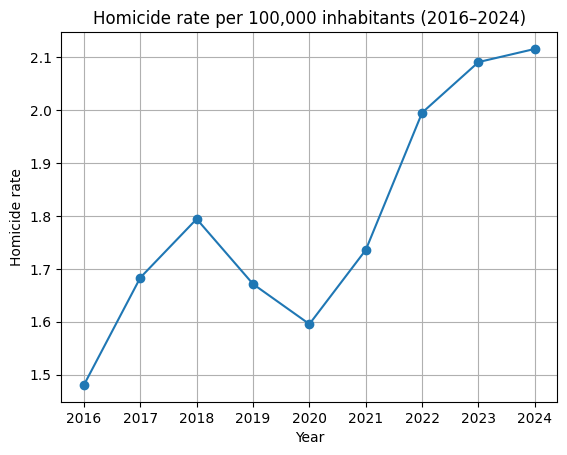

In [53]:
#Calculate the homicide rate and plot it. The population number has been multiplied by 1000 as it was displayed in thousands people in the excelfile and the dataframes before
df_hom_rate = df_merged_renamed['Homicides (y compris coups et blessures volontaires suivis de mort)'] / (df_merged_renamed['Population']*1000) * 100_000
plt.plot(df_merged_renamed['Année'], df_hom_rate, marker='o')
plt.title("Homicide rate per 100,000 inhabitants (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Homicide rate")
plt.grid(True)
plt.show()



##Plotting absolute evolution of sexual violences and plot the sexual violences rate

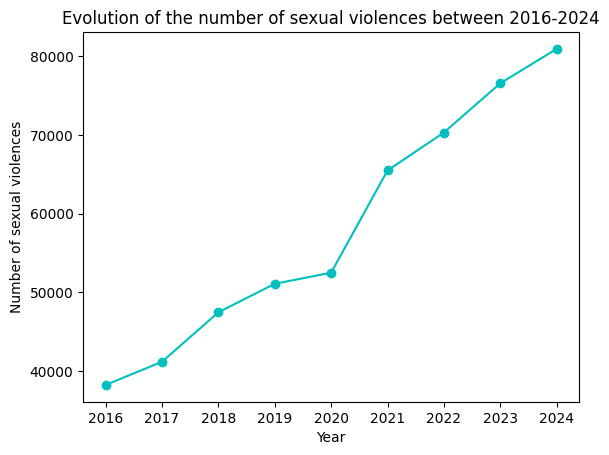

In [227]:
#Plot the absolute evolution of sexual violence to vizualize the trend
plt.plot(df_total['Année'], df_total['Violences sexuelles'], '-oc')
plt.title("Evolution of the number of sexual violences between 2016-2024")
plt.xlabel("Year")
plt.ylabel("Number of sexual violences")
plt.show()

In [54]:
#Gather data on sexual violence and population on the same table to then plot their evolution on the same graph
df_total_sv = df_total[['Année', 'Violences sexuelles']]
df_merged_sv = pd.merge(df_total_sv, df_pop_années_ensemble, on="Année")
df_merged_sv_renamed = df_merged_sv.rename(columns={"Ensemble": "Population"})
df_merged_sv_renamed.head(10)

,Année,Violences sexuelles,Population
0,2016,38250,66602.645
1,2017,41195,66774.482
2,2018,47480,66992.159
3,2019,51090,67257.982
4,2020,52505,67441.850
5,2021,65480,67697.091
6,2022,70298,68060.207
7,2023,76549,68246.082
8,2024,80916,68436.616


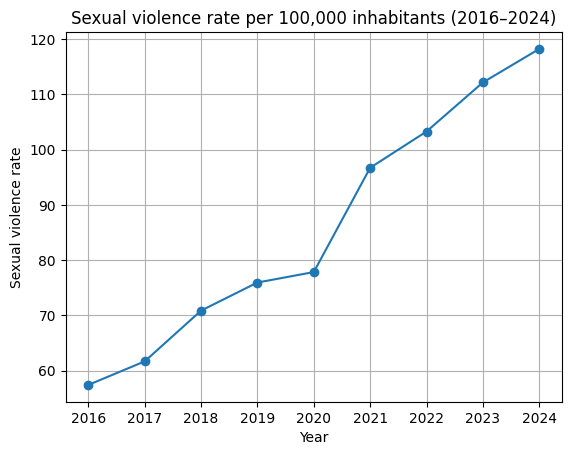

In [55]:
#Calculate the sexual violence rate and plot it. The population number has been multiplied by 1000 as it was displayed in thousands people in the excelfile and the dataframes before
df_sv_rate = df_merged_sv_renamed['Violences sexuelles'] / (df_merged_sv_renamed['Population']*1000) * 100_000
plt.plot(df_merged_sv_renamed['Année'], df_sv_rate, marker='o')
plt.title("Sexual violence rate per 100,000 inhabitants (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Sexual violence rate")
plt.grid(True)
plt.show()

##Plotting the absolute evolution of physical domestic violence and it's rate

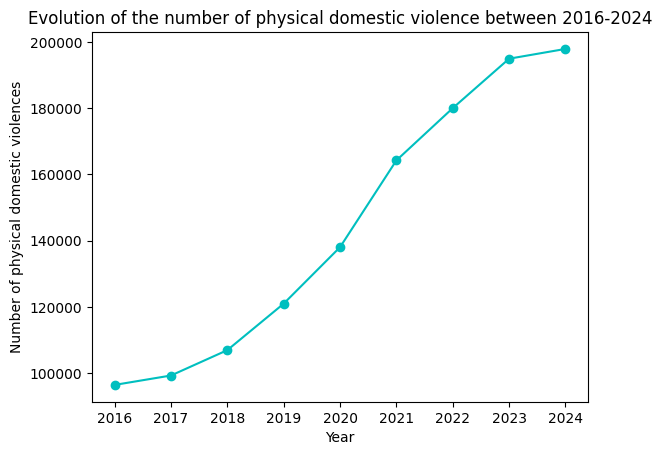

In [228]:
#Plot the absolute evolution of physical domestic violence to vizualize the trend
plt.plot(df_total['Année'], df_total['Violences physiques dans le cadre intra-familial'], '-oc')
plt.title("Evolution of the number of physical domestic violence between 2016-2024")
plt.xlabel("Year")
plt.ylabel("Number of physical domestic violences")
plt.show()

In [229]:
#Gather data on domestic physical violence and population on the same table to then plot their evolution on the same graph
df_total_dpv = df_total[['Année', 'Violences physiques dans le cadre intra-familial']]
df_merged_dpv = pd.merge(df_total_dpv, df_pop_années_ensemble, on="Année")
df_merged_dpv_renamed = df_merged_dpv.rename(columns={"Ensemble": "Population"})
df_merged_dpv_renamed.head(10)

,Année,Violences physiques dans le cadre intra-familial,Population
0,2016,96392,66602.645
1,2017,99234,66774.482
2,2018,106902,66992.159
3,2019,120950,67257.982
4,2020,138026,67441.850
5,2021,164256,67697.091
6,2022,180057,68060.207
7,2023,195000,68246.082
8,2024,197954,68436.616


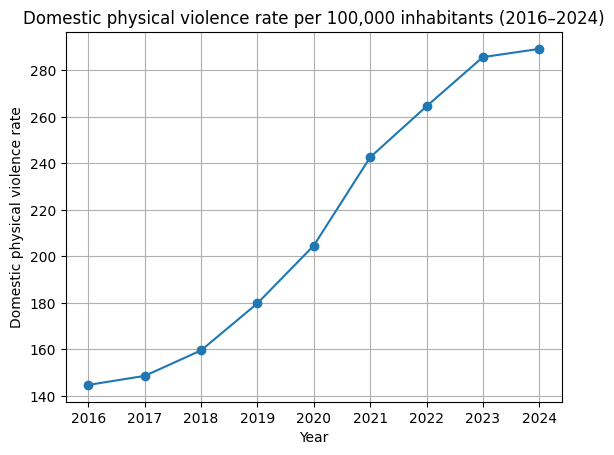

In [230]:
#Calculate the domestic physical violence rate and plot it. The population number has been multiplied by 1000 as it was displayed in thousands people in the excelfile and the dataframes before
df_dpv_rate = df_merged_dpv_renamed['Violences physiques dans le cadre intra-familial'] / (df_merged_dpv_renamed['Population']*1000) * 100_000
plt.plot(df_merged_dpv_renamed['Année'], df_dpv_rate, marker='o')
plt.title("Domestic physical violence rate per 100,000 inhabitants (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Domestic physical violence rate")
plt.grid(True)
plt.show()

##Plotting the absolute evolution of non-violent theft and it's rate

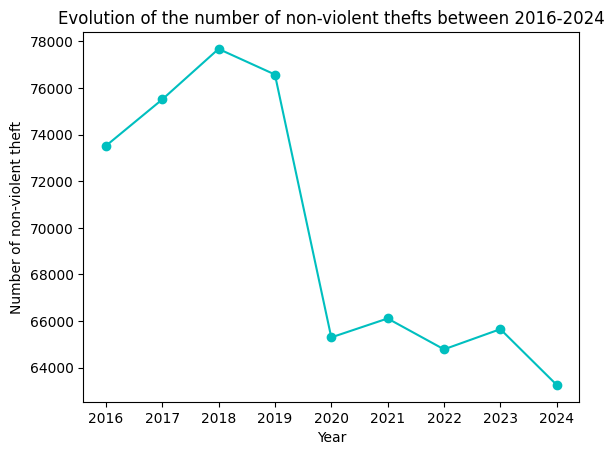

In [231]:
#Plot the absolute evolution of non-violent thefts to vizualize the trend
plt.plot(df_total['Année'], df_total['Vols sans violence contre des personnes'], '-oc')
plt.title("Evolution of the number of non-violent thefts between 2016-2024")
plt.xlabel("Year")
plt.ylabel("Number of non-violent theft")
plt.show()

In [232]:
#Gather data on non-violent thefts and population on the same table to then plot their evolution on the same graph
df_total_nvt = df_total[['Année', 'Vols sans violence contre des personnes']]
df_merged_nvt = pd.merge(df_total_nvt, df_pop_années_ensemble, on="Année")
df_merged_nvt_renamed = df_merged_nvt.rename(columns={"Ensemble": "Population"})
df_merged_nvt_renamed.head(10)

,Année,Vols sans violence contre des personnes,Population
0,2016,73516,66602.645
1,2017,75509,66774.482
2,2018,77679,66992.159
3,2019,76580,67257.982
4,2020,65298,67441.850
5,2021,66110,67697.091
6,2022,64785,68060.207
7,2023,65652,68246.082
8,2024,63258,68436.616


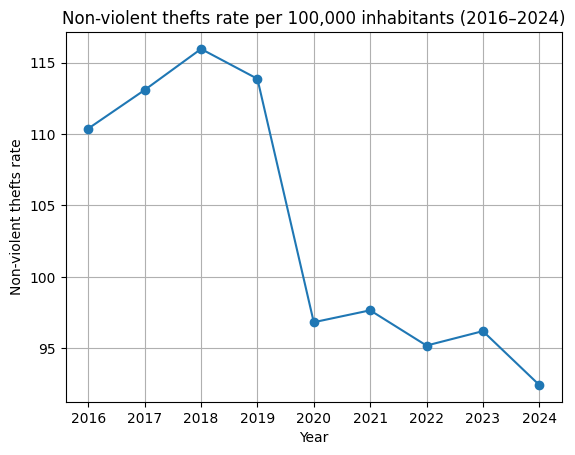

In [233]:
#Calculate the non-violent thefts rate and plot it. The population number has been multiplied by 1000 as it was displayed in thousands people in the excelfile and the dataframes before
df_nvt_rate = df_merged_nvt_renamed['Vols sans violence contre des personnes'] / (df_merged_nvt_renamed['Population']*1000) * 100_000
plt.plot(df_merged_nvt_renamed['Année'], df_nvt_rate, marker='o')
plt.title("Non-violent thefts rate per 100,000 inhabitants (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Non-violent thefts rate")
plt.grid(True)
plt.show()

# **Part 2: What variables are most closely linked to committing a crime?**


In [207]:
df_pop_années.columns = (
    df_pop_années.columns
    .astype(str)
    .str.strip()
)
print(df_pop_années.columns.tolist())

['Année', 'Femmes', 'Hommes', 'Ensemble']


In [208]:
#Reshaping the population data in long format (vs. wide format, where each category is in a separate column),
#so that each variable is in a single column, and there’s a column that indicates the category:
df_pop_années_long = df_pop_années.melt(
    id_vars='Année',
    value_vars=['Femmes', 'Hommes', 'Ensemble'],
    var_name='Sexe',
    value_name='Population'
)

In [209]:
sex_mapping = {
    'Femmes': 'female',
    'Femme': 'female',
    'Hommes': 'male',
    'Homme': 'male',
    'Ensemble': 'total',
    'Total': 'total'
    }


In [210]:
print(df_pop_années_long['Sexe'].value_counts(dropna=False))
print(pivoted_df['Sexe'].value_counts(dropna=False))

Sexe
Femmes      9
Hommes      9
Ensemble    9
Name: count, dtype: int64
Sexe
Femme    9
Homme    9
Total    9
Name: count, dtype: int64


In [211]:
#Copy created to not have to go on the top of the page to run the pivoted_df cell
pivoted_df_copy = pivoted_df.copy()


In [212]:
df_pop_années_long['Sexe'] = df_pop_années_long['Sexe'].map(sex_mapping)

pivoted_df_copy['Sexe'] = pivoted_df_copy['Sexe'].map(sex_mapping)

In [213]:
sv_totals = (
    pivoted_df_copy
    .groupby('Sexe')['Violences sexuelles']
    .sum()
    .reset_index()
)

pop_totals = (
    df_pop_années_long
    .groupby('Sexe')['Population']
    .sum()
    .reset_index()
)

In [214]:
df_sv_rates_by_sex = pd.merge(sv_totals, pop_totals, on='Sexe')

df_sv_rates_by_sex['Rate per 100k'] = (
    df_sv_rates_by_sex['Violences sexuelles'] / (df_sv_rates_by_sex['Population']*1000) * 100_000
)
df_sv_rates_by_sex_renamed = df_sv_rates_by_sex.rename(columns={
    "Violences sexuelles": "Sexual violences",
    "Sexe": "Sex"
    })
df_sv_rates_by_sex_renamed

,Sex,Sexual violences,Population,Rate per 100k
0,female,22611,313428.108,7.214095
1,male,501152,294081.006,170.412910
2,total,523763,607509.114,86.214838


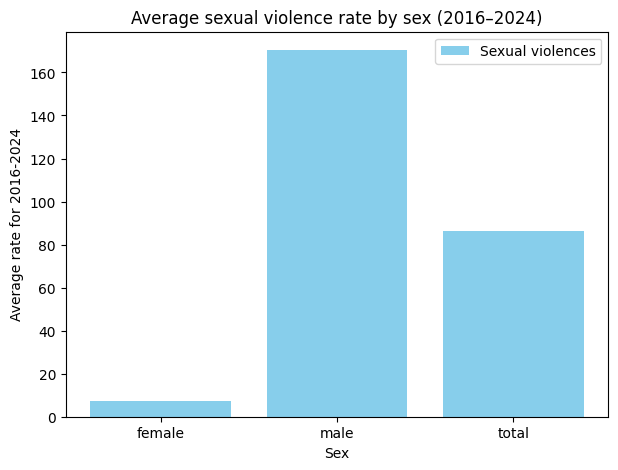

In [226]:
#Plot barplots for different crime on the sex variable to see the criminality rate by sex,
# and then analyze for exemple which crimes women are the most likely to commit

plt.figure(figsize=(7,5))
plt.bar(df_sv_rates_by_sex_renamed["Sex"], df_sv_rates_by_sex_renamed["Rate per 100k"], color='skyblue', label='Sexual violences')
plt.title("Average sexual violence rate by sex (2016–2024)")
plt.xlabel("Sex")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()





In [30]:
#Show Excel File - Total accused people

df = pd.read_excel(path, sheet_name="5.PM - PP")
df.head()

,Unnamed: 0,Nombre de de mis en cause pour des infractions élucidées par la police et la gendarmerie nationales selon la personnalité juridique de 2016 à 2024,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2016,2017,2018,2019,2020,2021,2022,2023,2024
2,NaN,Homicides (y compris coups et blessures volont...,Personne morale,<5,0,0,0,0,0,0,<5,0
3,NaN,NaN,Personne physique,986,1124,1202,1124,1076,1175,1358,1427,1448
4,NaN,Tentatives d'homicide,Personne morale,0,0,0,0,0,0,0,0,0


In [ ]:
#Only work with lines about individuals "personnes physiques" and not companies "personnes morales"

df_PP = df.iloc[1::2].reset_index(drop=True)
df_PP.head()

,Unnamed: 0,Nombre de de mis en cause pour des infractions élucidées par la police et la gendarmerie nationales selon la personnalité juridique de 2016 à 2024,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,NaN,NaN,Personne physique,986,1124,1202,1124,1076,1175,1358,1427,1448
2,NaN,NaN,Personne physique,1871,2162,2318,2393,2609,2802,3099,3462,3390
3,NaN,NaN,Personne physique,96392,99234,106902,120950,138026,164256,180057,195000,197954
4,NaN,NaN,Personne physique,126881,130463,140508,136623,126220,133195,131188,137540,136407


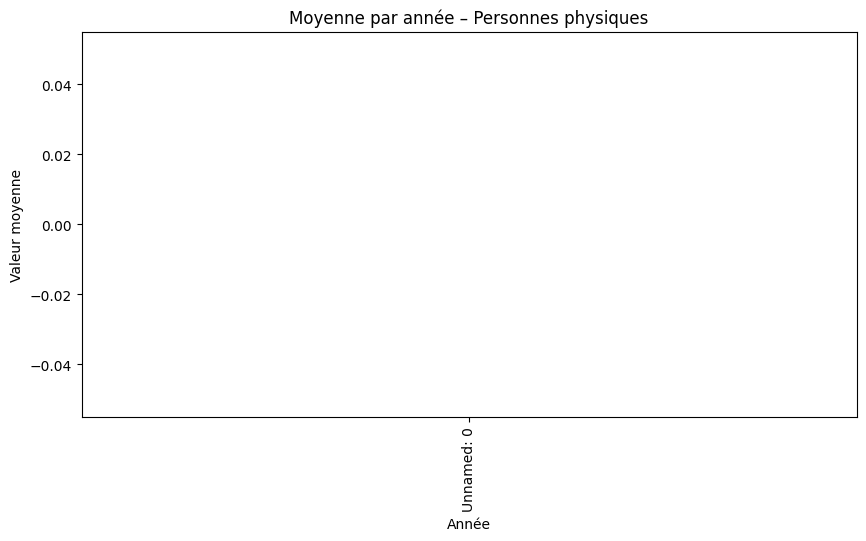

In [ ]:
#Trial for first visualisation

df_PP_numeric = df_PP.select_dtypes(include="number")

df_PP_numeric.mean().plot(kind="bar", figsize=(10,5))
plt.title("Moyenne par année – Personnes physiques")
plt.xlabel("Année")
plt.ylabel("Valeur moyenne")
plt.show()

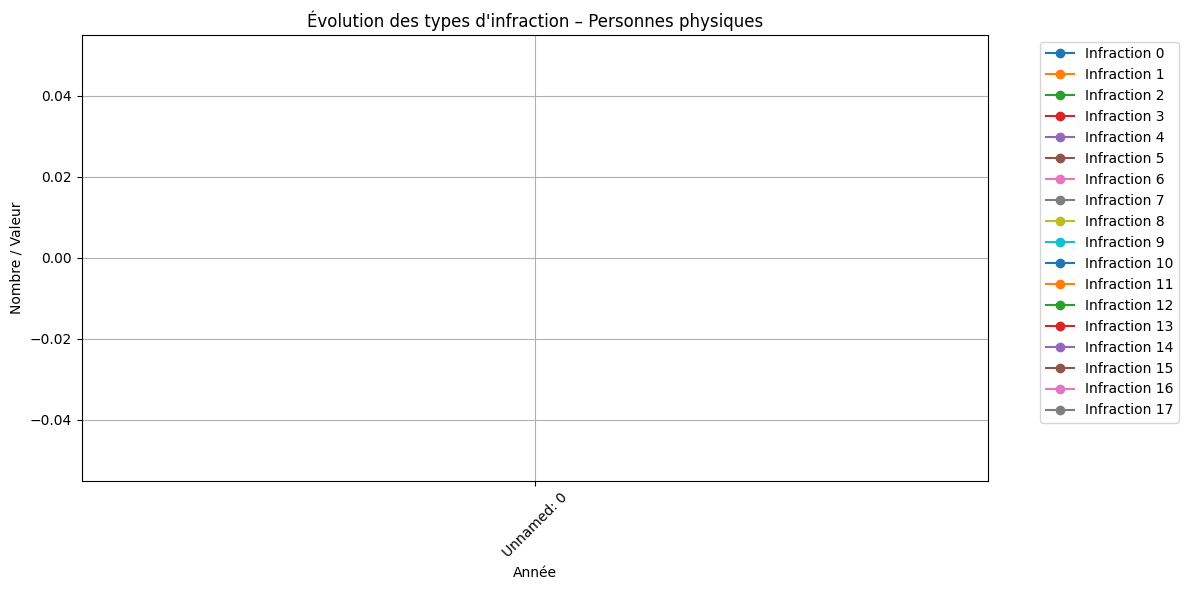

In [ ]:
df_numeric = df_PP.select_dtypes(include="number")

df_numeric.index = df_PP.index  # garder les lignes comme index

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for idx, row in df_numeric.iterrows():
    plt.plot(df_numeric.columns, row, marker='o', label=f'Infraction {idx}')

plt.title("Évolution des types d'infraction – Personnes physiques")
plt.xlabel("Année")
plt.ylabel("Nombre / Valeur")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # légende à côté
plt.grid(True)
plt.tight_layout()
plt.show()

test